# Load the user-item rating dataset


In [ ]:
import pandas as pd

# Load the user-item rating dataset
dataset_path = "/content/drive/MyDrive/Recommendation System/dataset.csv"
#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv(dataset_path, sep = '\t', names = column_names)
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


# Load the movie titles dataset with corresponding movieId


In [ ]:
# Load the movie titles dataset with corresponding movieId
movie_titles_path = "/content/drive/MyDrive/Recommendation System/movieIdTitles.csv"
movie_titles = pd.read_csv(movie_titles_path)
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merge the datasets based on item_id


In [ ]:
# Merge the datasets based on item_id
df = pd.merge(data, movie_titles, on='item_id')

# Display the first few rows of the merged dataframe
df.tail()


,user_id,item_id,rating,timestamp,title
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
100002,655,1641,3,887427810,Dadetown (1995)


# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

In [ ]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [ ]:
df.shape

(100003, 5)

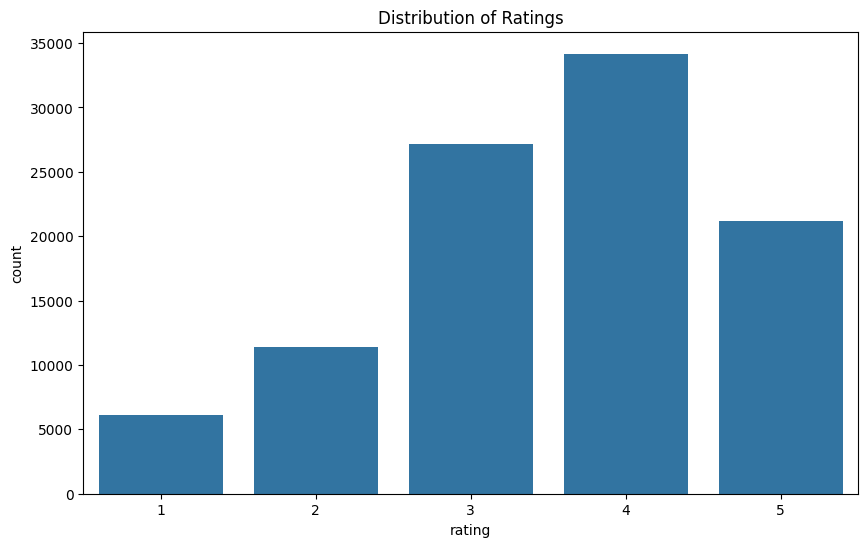

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

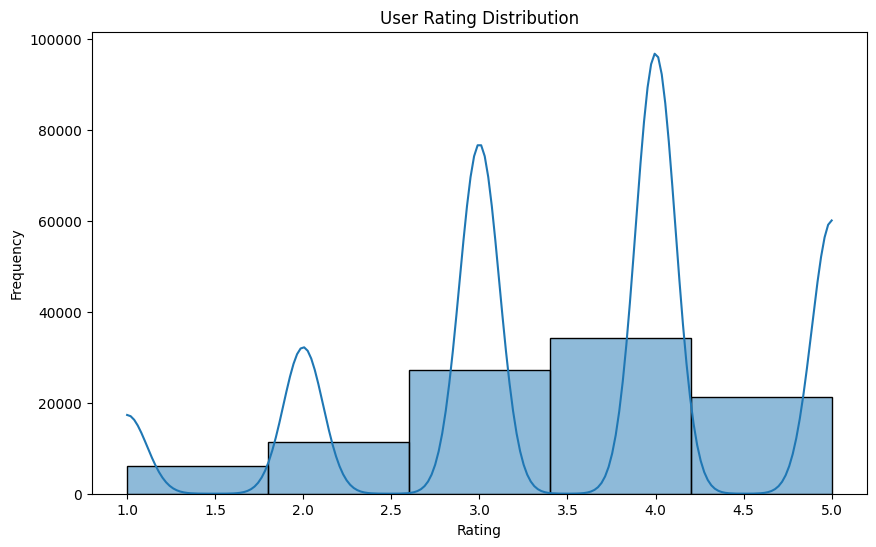

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('User Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


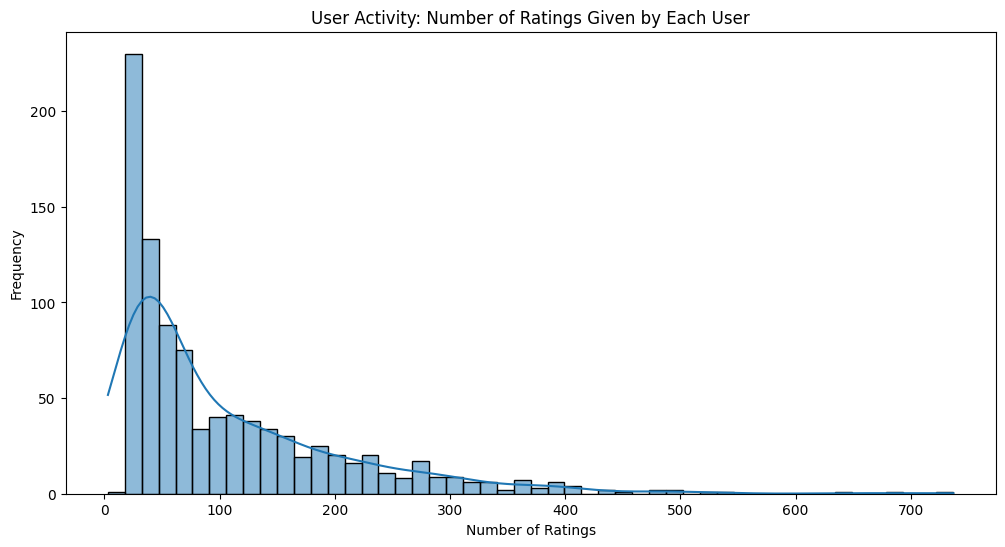

In [ ]:
user_activity = df.groupby('user_id')['rating'].count()
plt.figure(figsize=(12, 6))
sns.histplot(user_activity, bins=50, kde=True)
plt.title('User Activity: Number of Ratings Given by Each User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


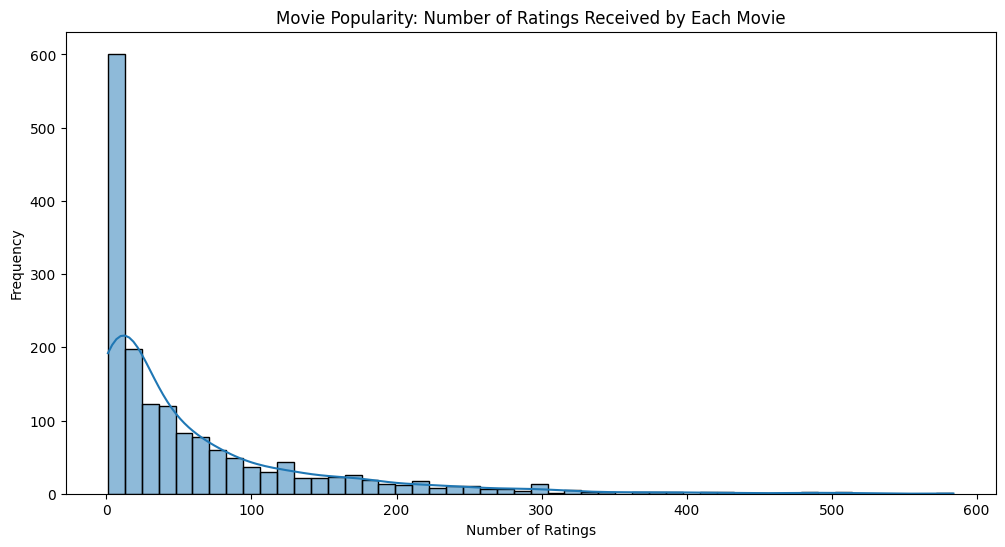

In [ ]:
movie_popularity = df.groupby('title')['rating'].count()
plt.figure(figsize=(12, 6))
sns.histplot(movie_popularity, bins=50, kde=True)
plt.title('Movie Popularity: Number of Ratings Received by Each Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


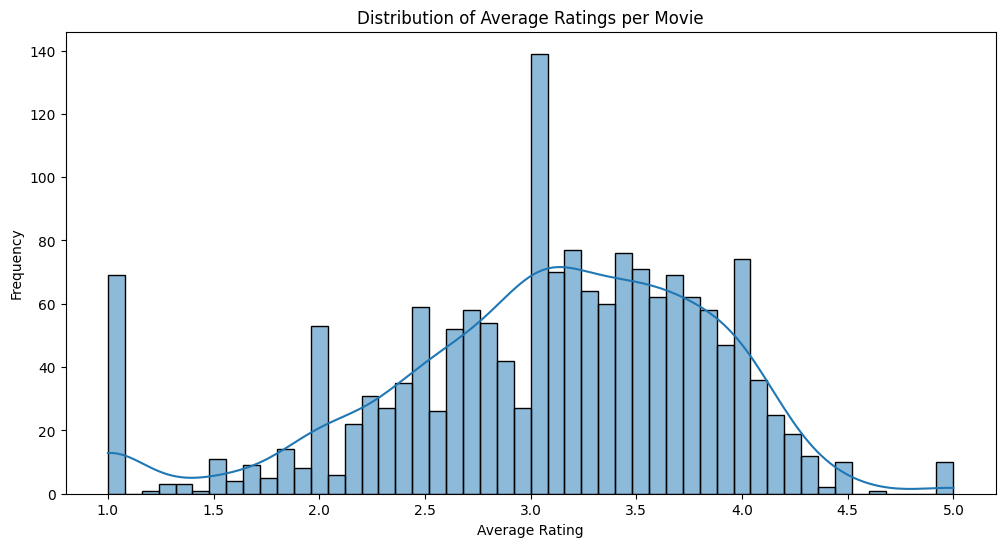

In [ ]:
# Visualize the distribution of average ratings per movie
average_rating_per_movie = df.groupby('title')['rating'].mean()
plt.figure(figsize=(12, 6))
sns.histplot(average_rating_per_movie, bins=50, kde=True)
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


# **Collaborative Filtering Recommendation System**

In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162676 sha256=44451521db7cbc6c05aefaf21ca5a374422230d4241ee42d6b0373f370a1b12f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


# Import necessary libraries


In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

# Create a Reader object
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise Dataset
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)


# Split the data into training and testing sets


In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)


# Initialize the SVD algorithm and Train the model


In [ ]:
# Initialize the SVD algorithm (you can experiment with other algorithms too)
model = SVD()

# Train the model on the training set
model.fit(trainset)



# Make prediction and Evaluate the model using RMSE (Root Mean Squared Error)

In [ ]:
# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE on the test set: {rmse}")


RMSE: 0.9348
RMSE on the test set: 0.9348467394559362


# Choose a user_id to and get recommendations


In [ ]:
# Choose a user_id to get recommendations
user_id = 100

# Get the list of movies the user has not rated
movies_not_rated_by_user = df[df['user_id'] == user_id]['item_id'].values
movies_to_predict = [movie_id for movie_id in df['item_id'].unique() if movie_id not in movies_not_rated_by_user]

# Predict ratings for the movies not rated by the user
user_ratings = [(user_id, movie_id, model.predict(user_id, movie_id).est) for movie_id in movies_to_predict]

# Get the top N recommendations
top_n = 10
user_ratings.sort(key=lambda x: x[2], reverse=True)
top_recommendations = user_ratings[:top_n]

# Display the top recommendations
print(f"\nTop {top_n} Recommendations for User {user_id}:")
for user_id, movie_id, predicted_rating in top_recommendations:
    movie_title = movie_titles[movie_titles['item_id'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating:.2f}")



Top 10 Recommendations for User 100:
Movie: Wrong Trousers, The (1993), Predicted Rating: 4.30
Movie: Schindler's List (1993), Predicted Rating: 4.25
Movie: Close Shave, A (1995), Predicted Rating: 4.21
Movie: Casablanca (1942), Predicted Rating: 4.20
Movie: Star Wars (1977), Predicted Rating: 4.15
Movie: Shawshank Redemption, The (1994), Predicted Rating: 4.10
Movie: One Flew Over the Cuckoo's Nest (1975), Predicted Rating: 4.08
Movie: Third Man, The (1949), Predicted Rating: 4.05
Movie: Wallace & Gromit: The Best of Aardman Animation (1996), Predicted Rating: 4.05
Movie: Grand Day Out, A (1992), Predicted Rating: 4.05


# **Content-Based Recommendation**


In [ ]:
# Example: Suppose you have a 'description' column with movie descriptions
movie_titles['description'] = movie_titles['title'] + ' ' + 'genre'  # Combine title and genre for simplicity

# Display the first few rows
print(movie_titles[['item_id', 'title', 'description']].head())


   item_id              title              description
0        1   Toy Story (1995)   Toy Story (1995) genre
1        2   GoldenEye (1995)   GoldenEye (1995) genre
2        3  Four Rooms (1995)  Four Rooms (1995) genre
3        4  Get Shorty (1995)  Get Shorty (1995) genre
4        5     Copycat (1995)     Copycat (1995) genre


# Create a TF-IDF vectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the description data
tfidf_matrix = tfidf_vectorizer.fit_transform(movie_titles['description'].fillna(''))

# Display the TF-IDF matrix
print(tfidf_matrix.shape)


(1682, 2292)


# Calculate cosine similarity between movies


In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Calculate cosine similarity between movies
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Display the shape of the similarity matrix
print(cosine_similarities.shape)


(1682, 1682)


# Function to get content-based recommendations


In [ ]:
# Function to get content-based recommendations
def content_based_recommendations(movie_id, num_recommendations=5):
    # Calculate similarity scores for the given movie
    cosine_similarities_for_movie = cosine_similarities[movie_id]

    # Get movie indices sorted by similarity score
    movie_indices = cosine_similarities_for_movie.argsort()[::-1]

    # Exclude the given movie itself
    movie_indices = [idx for idx in movie_indices if idx != movie_id]

    # Return top N recommendations
    return movie_indices[:num_recommendations]


# Example: Get content-based recommendations for movie with item_id


In [ ]:
# Example: Get content-based recommendations for movie with item_id
movie_id_to_recommend = 100
content_rec_indices = content_based_recommendations(movie_id_to_recommend, num_recommendations=5)

# Display the recommended movies
print("Content-Based Recommendations:")
for rec_movie_id in content_rec_indices:
    rec_movie_title = movie_titles[movie_titles['item_id'] == rec_movie_id]['title'].values[0]
    print(f"Movie: {rec_movie_title}")


Content-Based Recommendations:
Movie: Stalingrad (1993)
Movie: Godfather: Part II, The (1974)
Movie: 'Til There Was You (1997)
Movie: Escape from New York (1981)
Movie: Bad Taste (1987)


# Function to get content-based recommendations based on movie title


In [ ]:
# Function to get content-based recommendations based on movie title
def content_based_recommendations_by_title(movie_title, num_recommendations=5):
    # Get the movie_id for the given title
    movie_id = movie_titles[movie_titles['title'] == movie_title]['item_id'].values[0]

    # Calculate similarity scores for the given movie
    cosine_similarities_for_movie = cosine_similarities[movie_id]

    # Get movie indices sorted by similarity score
    movie_indices = cosine_similarities_for_movie.argsort()[::-1]

    # Exclude the given movie itself
    movie_indices = [idx for idx in movie_indices if idx != movie_id]

    # Return top N recommendations
    return movie_indices[:num_recommendations]


# Example: Get content-based recommendations for the movie with title


In [ ]:
# Example: Get content-based recommendations for the movie with title
movie_title_to_recommend = 'Toy Story (1995)'
content_rec_indices = content_based_recommendations_by_title(movie_title_to_recommend, num_recommendations=5)

# Display the recommended movies
print("Content-Based Recommendations:")
for rec_movie_id in content_rec_indices:
    rec_movie_title = movie_titles[movie_titles['item_id'] == rec_movie_id]['title'].values[0]
    print(f"Movie: {rec_movie_title}")


Content-Based Recommendations:
Movie: Schizopolis (1996)
Movie: Shadows (Cienie) (1988)
Movie: Dracula: Dead and Loving It (1995)
Movie: Nine Months (1995)
Movie: Smile Like Yours, A (1997)


# **Hybrid Recommendation System**

In [ ]:
# Function to get hybrid recommendations
def hybrid_recommendations_by_title(user_id, movie_title, num_collaborative=3, num_content=2):
    # Get the movie_id for the given title
    movie_id = movie_titles[movie_titles['title'] == movie_title]['item_id'].values[0]

    # Get collaborative filtering recommendations
    collab_rec = model.test([(user_id, movie_id, 3.5)])  # Replace 3.5 with the user's predicted rating for the given movie
    collab_rec = [(pred.iid, pred.est) for pred in collab_rec]
    collab_rec.sort(key=lambda x: x[1], reverse=True)

    # Get content-based recommendations
    content_rec_indices = content_based_recommendations_by_title(movie_title, num_content)

    # Combine collaborative and content-based recommendations with weights
    hybrid_rec = collab_rec[:num_collaborative] + [(idx, 0.5) for idx in content_rec_indices]

    # Sort the final recommendations by weighted score
    hybrid_rec.sort(key=lambda x: x[1], reverse=True)

    return hybrid_rec

# Example usage
user_id = 42
movie_title_to_recommend = 'Toy Story (1995)'

# Get hybrid recommendations
hybrid_rec = hybrid_recommendations_by_title(user_id, movie_title_to_recommend, num_collaborative=3, num_content=5)

# Display the hybrid recommendations
print("\nHybrid Recommendations:")
for movie_id, weighted_score in hybrid_rec:
    movie_title = movie_titles[movie_titles['item_id'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Weighted Score: {weighted_score:.2f}")



Hybrid Recommendations:
Movie: Toy Story (1995), Weighted Score: 4.35
Movie: Schizopolis (1996), Weighted Score: 0.50
Movie: Shadows (Cienie) (1988), Weighted Score: 0.50
Movie: Dracula: Dead and Loving It (1995), Weighted Score: 0.50
Movie: Nine Months (1995), Weighted Score: 0.50
Movie: Smile Like Yours, A (1997), Weighted Score: 0.50
